In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf
from tensorflow import keras

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close

--2024-06-28 08:30:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.207, 142.251.167.207, 172.253.115.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   146MB/s    in 0.7s    

2024-06-28 08:30:55 (146 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



<bound method ZipFile.close of <zipfile.ZipFile filename='pizza_steak.zip' mode='r'>>

In [3]:
import os

# Walk through 'pizza_steak' directory and list the number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [4]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jun 28 08:30 .
drwxr-xr-x 1 root root 4096 Jun 28 08:30 ..
drwxr-xr-x 4 root root 4096 Jun 28 08:30 test
drwxr-xr-x 4 root root 4096 Jun 28 08:30 train


In [5]:
num_streak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_streak_images_train

750

In [6]:
import pathlib
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [7]:
#lets visualize our iamge
import matplotlib.pyplot as mpimg
import random
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


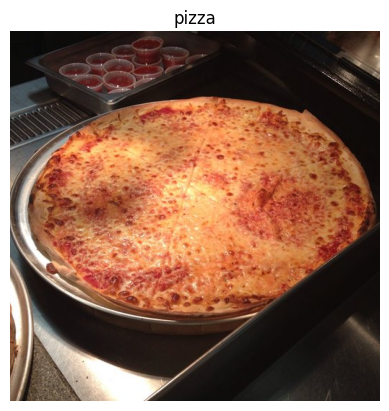

In [8]:
img = view_random_image('pizza_steak/train/', 'pizza')

*load our images

*preprocess our image

*build a cnn to find patterns in our image

*compile our cnn

*fit our model

*evaluate our model

*fine tune our model

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#set seed
tf.random.set_seed(42)
#preprocess dara (get all pixel value from 0 to 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
#setup training data (path)
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'
#import data form  directories and turn it into baches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)
#build a cNN moodel
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = "relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
#comiple our cNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
 7/47 [===>..........................] - ETA: 1:51 - loss: 0.6930 - accuracy: 0.5045

In [ ]:
tf.random.set_seed(42)
#create a model to replicate
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])
#compile\
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data= valid_data,
                        validation_steps=len(valid_data))

In [ ]:
model_2.summary()

In [ ]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [ ]:
model_1.summary()


In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"


In [ ]:
#create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size= 32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

In [ ]:
images, labels = train_data.next()
len(images), len(labels)

In [ ]:
images[:2], images[0].shape

# 3.create a CNN model(start a baseline)

a baseline relattively simple model or existede result that you setup ewhen begning a ml experiment and thebb as you keep  experiment  

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size = 3,
           strides=1,
           padding="valid",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")#output layers(working with binary classsification so only 1 output neurons)
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch= len(train_data),
                        validation_data= test_data,
                        validation_steps= len(test_data))

# evaluating a model

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7))

In [ ]:

def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [ ]:
plot_loss_curves(history_4)

**Adjust the model parameters**

*Fitting a ml model comes in 3 steps*

0. create a baseeline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

ways to induce overfitting
* Increase the num of conv layers
* increase the numbers of convo filters
* Add another dense layers to the output of our flattertned layers

Redusce overfitting
* add data augmention
* Add regukarization
(such as maxpool2D)

* add more data


In [ ]:

model_5 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5= model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch = len(train_data),
                       validation_data= test_data,
                       validation_steps= len(test_data))

In [ ]:
model_5.summary()

In [ ]:
plot_loss_curves(history_5)

**what is data augments?**

data augements is the process of altering our data leading it to have more diversity and in turn allowing our models  to learn to learn more generalized patters altering might maeans adjusting the rotating of an image, flipping it, cropping it or something similar

In [ ]:
#create ImageDataGenerator traing instance with data augmentaion
train_datagen_argmented =ImageDataGenerator(rescale = 1/255.,
                                         rotation_range = 0.2,
                                         shear_range = 0.2,
                                         zoom_range=0.2,
                                         width_shift_range=0.2, #move images around x-axis
                                         height_shift_range=0.3,#move images around y-axis
                                         horizontal_flip=True)
#create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
#create ImageDataGenerator without data augemention for test data
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
#import data and augment it fom traniing directory
train_data_argmented = train_datagen_argmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  class_mode="binary",
                                                                  batch_size=32,
                                                                  shuffle=False)
#crate non_augments train data batces
train_data = train_datagen.flow_from_directory(train_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32,
                                             shuffle=False)
IMG_SIZE = (224, 224)
#create non-arguments test data batches
print("non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary")


**note data augemts is usally only perfromed on the traing data. using Imagedata**

In [ ]:
#**get sample data batches**
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_argmented.next()

In [ ]:
#show original iamges augments image
import random
random_number = random.randint(0,32)
print(f"showing images number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

In [ ]:
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_6 = model_6.fit(train_data_argmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_argmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
train_data_argmented_shuffled = train_datagen_argmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  class_mode="binary",
                                                                  batch_size=32,
                                                                  shuffle=False)

In [ ]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# history_7 = model_7.fit(train_data_augmented_shuffled,
#                         epochs = 5,
#                         steps_per_epoch = len(train_data_augmented_shuffled),
#                         validation_data = test_data,
#                         validation_steps = len(test_data))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generator
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True,
                                             fill_mode='nearest')

# Create the augmented training data generator
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32,
    shuffle=True
)

# Define the model
# model_7 = Sequential([
#     Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
#     MaxPooling2D(),
#     Conv2D(10, 3, activation="relu"),
#     MaxPooling2D(),
#     Conv2D(10, 3, activation="relu"),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(1, activation="sigmoid")
# ])
model_7 = Sequential([
 Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Train the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


In [ ]:
plot_loss_curves(history_7)

# repeat untill satisfied
since weve alredy beaten our baseline there. are afew things we cou;d try to contine to improve our model

* Inc the numbers of model layers(e.g. add more'Con2D' / 'maxpool2d'layers)

*Inc the numbers of filters in each ConvolutionDeltaOrthogonal

*train for longers

*find an ideal learning rate

*get more data

*Use **transfer learning** to levarage what another image model has learn and adjust it for our own use case

In [ ]:
print(class_names)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request

# Correct URL to the raw image
image_url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg"

# Download the image
urllib.request.urlretrieve(image_url, "03-steak.jpeg")

# Read and display the image
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)#read the image
  img = tf.image.decode_jpeg(img)#decode the read file binto tesnor
  img = tf.image.resize(img, [img_shape, img_shape])#rescale the image(get all values between 0 ande 1)
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak

In [ ]:
pred=model_7.predict(tf.expand_dims(steak, axis=0))
pred

In [ ]:
class_names

In [ ]:
#we can index the prediction class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]

In [ ]:
pred_class

In [ ]:
def pred_plot(model, filename, class_names):
  # import an image located at flename, amke prediction with modeland plot the image with the prediction class as the title
    img = load_and_prep_image(filename)
    #import the target image and preprocess it
    # Make predictions
    pred = model.predict(tf.expand_dims(img, axis=0))
    #get the prediction class
    pred_class = class_names[int(tf.round(pred))] # Use indexing instead of calling the array
    # plot image
    plt.imshow(img)
    plt.title(f"prediction: {pred_class}")
    plt.axis(False)

In [ ]:
pred_plot(model_7, "03-steak.jpeg", class_names)

In [ ]:
# donload another test custom images and make predction on it
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
pred_plot(model_7,"03-pizza-dad.jpeg" )